# Introduction

## Overview of Project and Notebook

**Driving Problem**: Do they tend to be more active on weekdays or weekends?

**Importance**: This question explores whether individuals maintain consistent physical activity across the entire week or primarily engage in movement during structure routines on weekdays. Understanding these patterns would be crucial to helping individuals optimise their routines and enable officials to make targeted health policies.

**Notebook Overview**: This notebook encompasses all steps, including data cleaning, analysis, and the presentation of results, to determine whether people are more active on weekdays or weekends. A comprehensive scaffold of this notebook's structure is given below.

**CONTENTS**:
- [Introduction](#Introduction)
    - [Overview of Project and Notebook](#Overview-of-Project-and-Notebook)
    - [Dataset Description](#Dataset-Description)
    - [Dataset Assumptions](#Dataset-Assumptions)
        - [Numerical Assumptions](#Numerical-Assumptions)
        - [Conceptual Assumptions](#Conceptual-Assumptions)
    - [Initial Prediction](#Prediction:-They-are-more-active-on-weekdays)
- [Data Cleaning](#Data-Cleaning)
    - [Loading, Importing, and Gaining Familiarity](#Loading,-Importing,-and-Gaining-Familiarity)
    - [Datetime Conversion and Format Adjustments](#Datetime-Conversion-and-Format-Adjustments)
    - [Outlier Analysis and Adjustments](#Outlier-Analysis-and-Adjustments)
        - [Outlier Participants](#Outlier-Participants)
        - [Outlier Days](#Outlier-Days)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Summary Statistics](#Summary-Statistics)
    - [Checking Assumptions](#Checking-Assumptions)
- [Adherence Analysis](#Adherence-Analysis)
    - [Applying Adherence Definitions](#Applying-Adherence-Definitions)
    - [Adherence Visualisations](#Adherence-Visualisations)
- [Visual Analysis](#Visual-Analysis)
- [Final Results](#Final-Results)
    - [Final Statement](#Final-Statement)



## Dataset Description
**Dataset 1:** ```dailySteps_merged```

This dataset captures the physical activity of 33 Fitbit users collected through an Amazon Mechanical Turk Survey. The data includes the total daily step count for each individual across a two month period.

**Features:**
- Timeframe: 03/12/2026 - 05/12/2016
- Source: An Amazon Mechanical Turk Survey collected the daily step data from a Fitbit tracker device.
- Variables:
    - ```Id```: An integer column with a unique identifier for each participant
    - ```ActivityDay```: The date of data that has been collected in MM/DD/YYYY format
    - ```StepTotal```: The total number of steps recorded on that day

**Dataset 2:** ```hourlySteps_merged``` 

This dataset captures the hourly physical activity of 33 Fitbit users collected through the same Amazon Mechanical Turk Survey. The data includes the total hourly step count for each individual over a given timeframe.

**Features:**
- Timeframe: 03/12/2026 - 05/12/2016
- Source: An Amazon Mechanical Turk Survey collected the daily step data from a Fitbit tracker device.
- Variables:
    - ```Id```: An integer column with a unique identifier for each participant
    - ```ActivityDay```:  The date and time of data collection in MM/DD/YYYY HH:MM AM/PM format
    - ```StepTotal```: The total number of steps recorded in that hour

## Dataset Assumptions

### Numerical Assumptions
- **Complete Data**: Each person has mostly full data across all days, hours, and minutes, with small amounts of missing data.
- **Missing Data Format**: Missing data will be reflected in a non-numerical value, 0 values are interpreted as inactivity rather than not wearing the device (as there is no way to know the difference from the data).
- **Positive Integers**: All step counts are positive integers.
- **Time period**: Both datasets cover the same period of time (without significant gaps) for the individuals being analysed.

### Conceptual Assumptions
- **Uniform Device Use**: All individuals used the Fitbit step-tracking device for consistency.
- **Consistent Measurement**: The tracker measured steps reliably for all individuals.
- **Accurate Step Counts**: The data accurately represents actual step movements (e.g. no shuffling).
- **Steps Only**: The data reflects only step-based activities, excluding other forms of physical activity (e.g. swimming).


## Prediction: They are more active on weekdays

This prediction stems from the idea that individuals typically have more structured routines during weekdays, such as commuting to work or school, promoting higher levels of activity as these routines require movement. Conversely, weekends are viewed as leisure time, with limited structure and more sedentary behaviour. Weekends are often used for low effort activities, shifting away from the movement involved in structured weekdays. 

**Potential Implications:**
- If the prediction is **true**, it suggests that these individuals could benefit from increasing weekend activities.
- If the prediction is **false**, this may suggest that individuals engage in more physical activity during their free time.

# Data Cleaning

## Loading, Importing, and Gaining Familiarity

In this section, the necessary libraries are imported and the two datasets - ```dailySteps_merged.csv``` and ```hourlyStepsWide_merged.csv``` - are loaded into the system memory. The ```copy()``` method is used to ensure that the original datasets remain unchanged during the analysis and ```head()``` is used to display the first few rows of the dataset, providing an initial view of the data structure.

In [ ]:
# Loads and Imports 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
from IPython.display import display_html, display, HTML, Markdown

In [ ]:
# Load both datasets and create copies to ensure the original dataset is not modified
daily_data = pd.read_csv("data/dailySteps_merged.csv").copy()
hourly_data = pd.read_csv("data/hourlySteps_merged.csv").copy()

# Data info for daily dataset (Overview of actual daily data, similar to the structure tables)
daily_overview = pd.DataFrame({
    'Id': daily_data['Id'],
    'ActivityDay': daily_data['ActivityDay'],
    'StepTotal': daily_data['StepTotal']
}).head()

# Data info for hourly dataset (Overview of actual hourly data)
hourly_overview = pd.DataFrame({
    'Id': hourly_data['Id'],
    'ActivityHour': hourly_data['ActivityHour'],
    'StepTotal': hourly_data['StepTotal']
}).head()

# Titles and captions for the overview tables
daily_title = "Daily Steps Data Overview"
hourly_title = "Hourly Steps Data Overview"
daily_caption = "Table 1: The daily step data includes the user ID, the date (ActivityDay), and the total steps taken for each day (StepTotal)."
hourly_caption = "Table 2: The hourly step data includes the user ID, the date and time (ActivityHour), and the total steps taken for each hour (StepTotal)."

# Function to display tables side by side and centered
def display_side_by_side_with_titles(*tables_with_titles):
    """Function to display tables side by side with titles and captions, and center the tables."""
    table_html = '<div style="display: flex; justify-content: center; align-items: center; margin: 20px;">'  # Flex container to center
    for title, table, caption in tables_with_titles:
        table_html += f"""
        <div style="padding: 10px; text-align: center;">
            <h3>{title}</h3>
            {table}
            <p><i><b>{caption.split(':')[0]}</b>: {caption.split(':')[1]}</i></p>
        </div>
        """
    table_html += '</div>'  # End of the flexbox
    display_html(table_html, raw=True)

# Display the tables side by side with the updated formatting
display_side_by_side_with_titles(
    (daily_title, daily_overview.to_html(index=False, justify='center'), daily_caption),
    (hourly_title, hourly_overview.to_html(index=False, justify='center'), hourly_caption)
)

Id,ActivityDay,StepTotal
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
Id,ActivityHour,StepTotal
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0


Both the daily and hourly step data contain ID columns, dates and step counts. The only difference is ```ActivityHour``` includes information on the associated hour for each ```StepTotal```, where ```ActivityDay``` is only dates.

The next steps applies the ```info()``` method to examine the data types of both datasets to verify that each column is appropriately formatted for analysis. This will help identify potential data type issues in future analysis. Additionally, the output also displays rows which contain missing values. For both datasets it is assumed that Id and step count variables will be stored as integers, while ```ActivityDay``` and ```ActivityHour``` are datetime objects.
Accurate types and non-null values will ensure that the dates can be grouped and aggregated to answer the driving question, which revolves around separating weekdays and weekends.

In [ ]:
# Checking data structure

# Load both datasets and create copies to ensure the original dataset is not modified
daily_data = pd.read_csv("data/dailySteps_merged.csv").copy()
hourly_data = pd.read_csv("data/hourlySteps_merged.csv").copy()

# Data info for daily dataset
daily_info = pd.DataFrame({
    'Column': ['Id', 'ActivityDay', 'StepTotal'],
    'Non-Null Count': ['940 non-null', '940 non-null', '940 non-null'],
    'Data Type': ['int64', 'object', 'int64']
})

# Data info for hourly dataset
hourly_info = pd.DataFrame({
    'Column': ['Id', 'ActivityHour', 'StepTotal'],
    'Non-Null Count': ['22,099 non-null', '22,099 non-null', '22,099 non-null'],
    'Data Type': ['int64', 'object', 'int64']
})

# Titles and captions
daily_title = "Daily Dataset Attributes Overview"
hourly_title = "Hourly Dataset Attributes Overview"
daily_caption = "Table 3: The daily dataset contains 940 entries with no missing values. 'Id' and 'StepTotal' are integers, while 'ActivityDay' is stored as an object."
hourly_caption = "Table 4: The hourly dataset contains 22,099 entries with no missing values. 'Id' and 'StepTotal' are integers, while 'ActivityHour' is stored as an object."

# Display the tables side by side (reuse function from above)
display_side_by_side_with_titles(
    (daily_title, daily_info.to_html(index=False, justify='center'), daily_caption),
    (hourly_title, hourly_info.to_html(index=False, justify='center'), hourly_caption)
)

Column,Non-Null Count,Data Type
Id,940 non-null,int64
ActivityDay,940 non-null,object
StepTotal,940 non-null,int64
Column,Non-Null Count,Data Type
Id,"22,099 non-null",int64
ActivityHour,"22,099 non-null",object
StepTotal,"22,099 non-null",int64


Both datasets have no missing values and the Id and step count variables are both stored as integers as assumed initially. The date variable is currently stored as an object rather than a datetime object. This needs to be corrected to ensure that the data can be aggregated correctly to answer the driving question. The inbuilt pandas ```to_datetime()``` function can be used.

## Datetime Conversion and Format Adjustments

For both datasets, the date attributes ```ActivityDay``` and ```ActivityHour``` are of type object. This needs to be converted to datetime so that the day of the week can be correctly extracted.

In [ ]:
# Fixing ActivityDay datatype 

# Convert data types of dates for both datasets. Store the result in the same dataframe
daily_data["ActivityDay"] = pd.to_datetime(daily_data["ActivityDay"], format="%m/%d/%Y")
hourly_data["ActivityHour"] = pd.to_datetime(hourly_data["ActivityHour"], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of changed columns to ensure correct conversion
print(f"In the daily data, the ActivityData column is of type {daily_data['ActivityDay'].dtype}.")
print(f"In the minutes data, the ActivityHour column is of type {hourly_data['ActivityHour'].dtype}.")

In the daily data, the ActivityData column is of type datetime64[ns].
In the minutes data, the ActivityHour column is of type datetime64[ns].


The data type has been correctly changed

It will also be useful to add columns identifying the day of each date, and whether a given date is a weekend or weekday.

In [ ]:
# Add columns indicating day name and type 

daily_data["DayName"] = daily_data["ActivityDay"].dt.day_name()
hourly_data["DayName"] = hourly_data["ActivityHour"].dt.day_name()
# Create a list of weekends 
weekends = ["Saturday", "Sunday"]

# Create a boolean column to determine whether the day is a weekday or not
daily_data["IsWeekend"] = daily_data["DayName"].isin(weekends) 
hourly_data["IsWeekend"] = hourly_data["DayName"].isin(weekends)

As described later, for adherence analysis it will be useful to determine the number of valid days with recorded activity exceeding 10 hours. The first step is to manipulate the ```ActivityHour``` data. This will involve splitting the ```ActivityHour``` into two separate components: ```ActivityDate``` for the date, and ```ActivityTime``` for the corresponding hour.

By extracting the date, hourly activity can be grouped data by day, allowing for the calculation of number of valid hours for each date. The goal is to identify days where the user engaged in physical activity for more than 10 hours.

The following code will perform the necessary data transformation to create separate columns for date and hour, and subsequently calculate the total number of active hours for each date.

In [ ]:
# Load the dataset
hourly_data = pd.read_csv("data/hourlySteps_merged.csv").copy()

# Assuming ActivityHour is in a specific format, specify the format to avoid parsing issues
hourly_data["ActivityHour"] = pd.to_datetime(hourly_data["ActivityHour"], format="%m/%d/%Y %I:%M:%S %p")

# Split ActivityHour column into date and time
hourly_data["ActivityDate"] = hourly_data["ActivityHour"].dt.date
hourly_data["ActivityTime"] = hourly_data["ActivityHour"].dt.time

# Add DayName and IsWeekend columns if not present
hourly_data["DayName"] = hourly_data["ActivityDate"].apply(lambda x: x.strftime("%A"))  # Extracts the weekday name
hourly_data["IsWeekend"] = hourly_data["DayName"].apply(lambda x: x in ["Saturday", "Sunday"])  # Checks if it's weekend

# Drop ActivityHour column as it is now redundant
hourly_data.drop(columns='ActivityHour', inplace=True)

# Reorder the columns to match the desired output format
hourly_data = hourly_data[['Id', 'StepTotal', 'DayName', 'IsWeekend', 'ActivityDate', 'ActivityTime']]

# Get the first few rows of the transformed dataset
transformed_data = hourly_data.head()

# Titles and captions
table_title = "<h3 style='text-align:center;'>Hourly Data After Splitting ActivityHour into Date and Time</h3>"
table_caption = "<p style='text-align:center;'><i><b>Table 5</b>: The ActivityHour column was split into ActivityDate and ActivityTime, with additional columns for DayName and IsWeekend. </i></p>"

# Display the table with the title and caption, centering everything
html_content = f"""
<div style="text-align: center;">
    {table_title}
    <div style="display: inline-block;">
        {transformed_data.to_html(index=False, justify='right')}
    </div>
    {table_caption}
</div>
"""

display_html(html_content, raw=True)


Id,StepTotal,DayName,IsWeekend,ActivityDate,ActivityTime
1503960366,373,Tuesday,False,2016-04-12,00:00:00
1503960366,160,Tuesday,False,2016-04-12,01:00:00
1503960366,151,Tuesday,False,2016-04-12,02:00:00
1503960366,0,Tuesday,False,2016-04-12,03:00:00
1503960366,0,Tuesday,False,2016-04-12,04:00:00


The dataframe has correctly split ```ActivityHour``` into a separate ```ActivityDate``` and ```ActivityTime``` column, storing the Date and Time of a record respectively. Additional columns categorising the ```DayName``` and ```IsWeekend``` have also been added.

## Outlier Analysis and Adjustments

### Outlier Participants

To understand participant data completeness, we start by assessing the total number of unique days recorded for each individual. For the preceding analysis, missing dates are assumed to reflect unrecorded participation, which may hinder the accuracy of our data by skewing the results, particularly if the missing days have a pattern, such as differing amounts of data available for weekends or weekdays.

We count active days for each individual to provide an overview of data completeness. The distribution and number of active days will inform our next steps, guiding adjustments based on data availability and potential outliers. 

It is predicted that there will be some variability in the number of active days available for all participants, as strict adherence to recording steps for each day of the study seems unlikely, as evidenced by the focus on adherence in this context. 

In [ ]:
# Obtain list of day counts of all individuals in the dataset
def total_days(data, person_id):
    # Subset for selected individual
    data_subset = data[data["Id"] == person_id]

    # Count the number of unique dates in the date column
    total_days = data_subset["ActivityDay"].nunique()

    # Return the total number of days 
    return total_days

participant_ids = daily_data["Id"].unique()

# Store the total days of data in a list
days_count = []

# Loop through participant ids and obtain the total days of data
for pid in participant_ids:
    days_count.append(total_days(daily_data, pid))

print("Day Counts:", days_count)

Day Counts: [30, 30, 30, 30, 30, 30, 30, 30, 18, 30, 20, 30, 30, 4, 30, 30, 30, 30, 30, 30, 30, 28, 29, 26, 30, 26, 30, 30, 19, 30, 30, 29, 30]


We now use the results to visualise the distribution of active days using a box plot to gain an overview of data availability and identify potential outliers. While some variability is expected, manual inspection suggests a generally high level of completeness across participants. Therefore, we expect that most participants will have data for nearly all days, with any outliers being relatively minor.

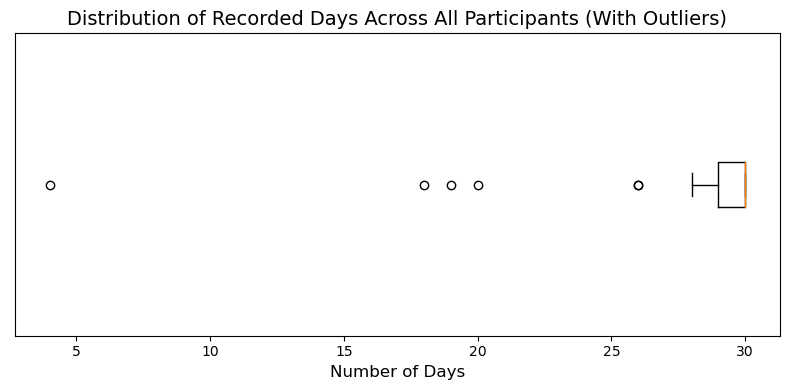


<div style='text-align: center;'>
    <i><b>Figure 1</b>: The overall distribution of the number of days of recorded data for all participants, highlighting potential outliers.</i>
</div>


In [ ]:
# Plot distribution of days to check for outliers - Start: 10/10/2024, End: 10/10/2024 - Completed by Nithya Iyengar
participant_ids = daily_data["Id"].unique()

# Plot the boxplot
plt.figure(figsize=(8, 4))  # Adjust the height to remove extra space
box = plt.boxplot(days_count, vert=False)  # Horizontal boxplot

# Formatting the plot
plt.title('Distribution of Recorded Days Across All Participants (With Outliers)', fontsize=14)
plt.xlabel('Number of Days', fontsize=12)

# Hide y-axis (since there's only one box plot)
plt.gca().axes.get_yaxis().set_visible(False)

# Display the plot
plt.tight_layout() 
plt.show()

# Adding the caption below the plot
caption = """
<div style='text-align: center;'>
    <i><b>Figure 1</b>: The overall distribution of the number of days of recorded data for all participants, highlighting potential outliers.</i>
</div>
"""
display(Markdown(caption))

Based on visual inspection, it appears that the majority of participants have nearly complete days of data, as predicted, indicated by the distribution in the interquartile range (IQR) of the box plot. However, contrary to our expectations, some notable outliers are present, with one participant showing as few as five days of recorded data.

We will examine these outliers individually to understand the number of missing days, and to later identify potential patterns in their distribution. 

In [ ]:
# Accessing outliers 
outliers = box['fliers'][0].get_xdata()
print("Outliers:", outliers)

Outliers: [18 20  4 19]


The analysis provided the number of active days of each individual outlier detected on the boxplot. 

We will now examine the distribution of active days for each individual outlier across the study period. This check is essential to maximise data retention for robust analysis. If the remaining days for each outlier are reasonably balanced between weekdays and weekends, we can likely retain them without risking bias. However, if available data clusters on either weekends or weekdays, the participant may need to be excluded to prevent skewing the results.

For participants with fewer than five days, we predict a notable imbalance since these few days cannot cover even a full week, making them more likely to introduce bias. Given the nature of non-adherence, we expect some randomness in missing days rather than an even spread across all outlier participants.

We first create a list with the ID of each outlier participant.

In [ ]:
# Initialise an empty list to store participant IDs with the outlier days
outlier_ids = []

# Loop through each value in the list of outliers
for val in outliers:
    # Find the index of the outlier value in the days_count list
    indx = days_count.index(val)
    
    # Use the index to get the corresponding participant ID from participant_ids
    # and add it to the out_participant list
    outlier_ids.append(participant_ids[indx])

print(outlier_ids)

[2347167796, 3372868164, 4057192912, 8253242879]


The function worked as intended. 

We next create a function to calculate the number of days of recorded activity for each outlier participant organised by the day of the week, to gain better understanding of the activity distribution.

In [ ]:
# Define function to obtain the distribution of days of activity 
def distribution_days(df, pid):
    # Create a subset of the dataframe for a particular individual
    # Create a copy to avoid potential warnings
    id_subset = df[df["Id"] == pid].copy()
    
    # Calculate the count of each day name in the 'DayName' column of the subset.
    dist = id_subset["DayName"].value_counts()
    
    # Return the distribution of activity days by day name for the given participant.
    return dist

The function works as intended.

Finally, we will present the results in a table for each participant, showing the distribution of their remaining active days, across each day of the week.

In [ ]:
# Initialise an HTML string to store the tables
html_content = "<div style='display: flex; flex-wrap: wrap; justify-content: center;'>"

# Initialise a list to hold participant IDs
participant_ids = []

# Loop through each participant ID that has been identified as an outlier
for idx, pid in enumerate(outlier_ids):
    # Get the count of activity days by day name for the specified participant ID
    dist = distribution_days(daily_data, pid)

    # Create a DataFrame for the distribution of days
    dist_table = pd.DataFrame({
        'Day Name': dist.index,
        'Count': dist.values
    })

    # Title for the distribution table
    dist_title = f"Day Distribution for Participant {pid}"
    
    # Add the participant ID to the list
    participant_ids.append(pid)

    # Convert the DataFrame to HTML format with centered alignment
    table_html = dist_table.to_html(index=False, justify='center')
    table_html = table_html.replace('<table', '<table style="margin: auto;"')  # Center the table

    # Append the title and table to the HTML content
    html_content += f"""
        <div style='width: 45%; margin: 10px;'>
            <h4 style='text-align: center;'>{dist_title}</h4>
            {table_html}
        </div>
    """

# Close the main div
html_content += "</div>"

# Display the tables in grid format
display(HTML(html_content))

caption = """
<div style='text-align: center;'>
    <i><b>Tables 6-9:</b> Distribution of activity days for participants 2347167796, 3372868164, 4057192912, and 8253242879.</i>
</div>
"""
display(Markdown(caption))

Day Name,Count
Tuesday,3
Wednesday,3
Thursday,3
Friday,3
Saturday,2
Sunday,2
Monday,2
Day Name,Count
Tuesday,3
Wednesday,3



<div style='text-align: center;'>
    <i><b>Tables 6-9:</b> Distribution of activity days for participants 2347167796, 3372868164, 4057192912, and 8253242879.</i>
</div>


Based on the table, our expectation was correct that the individual with fewer than five days of data (ID = 4057192912) has recorded data only on weekdays, which does not provide sufficient coverage of each day of the week for meaningful comparison or inclusion in the final dataset. 

Contrary to our initial predictions, the distribution of active days for other outlier participants is evenly spread across weekdays and weekends, suggesting a more structured pattern of missing days than anticipated. Therefore, we will only drop the participant with weekday-only data, as the remaining outliers' balanced day distributions are unlikely to significantly skew our analysis of weekday versus weekend activity.

### Outlier Days

Next, we will visualise step counts over the measured period to check for any issues or irregularities in the data. To achieve this, we will focus on the median steps on each day, as this is more robust to outliers than computing the mean. We do not expect there to be any notable issues with the data.

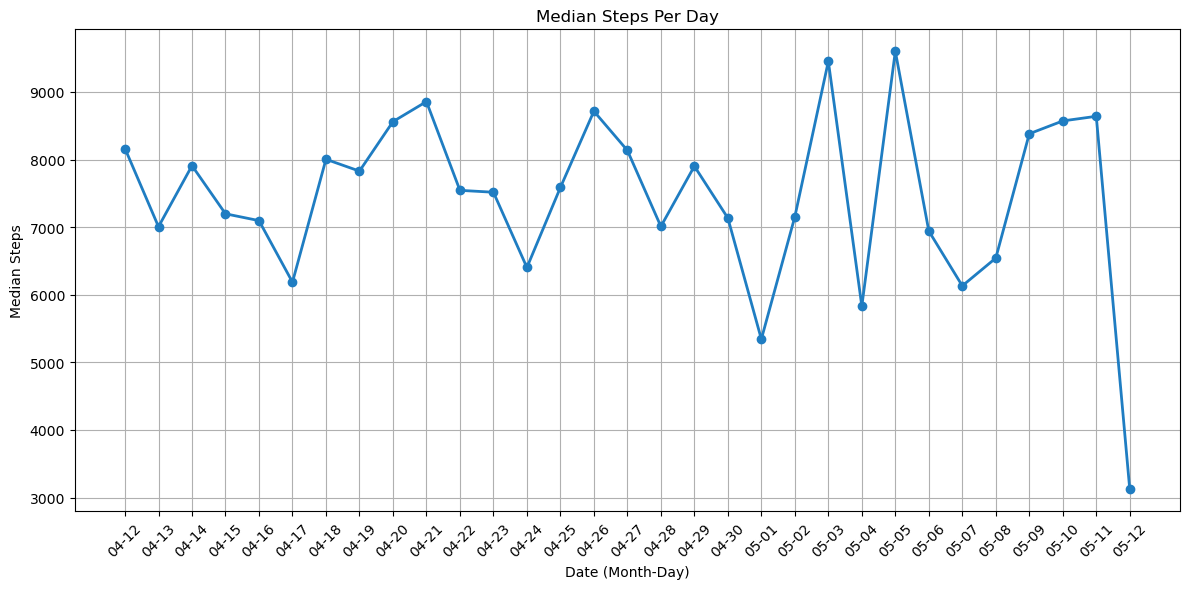

In [ ]:
# Compute median steps
median_steps_by_day = daily_data.groupby('ActivityDay')['StepTotal'].median().reset_index()

# Format 'ActivityDay' to display as 'month-day'
median_steps_by_day['ActivityDay'] = median_steps_by_day['ActivityDay'].dt.strftime('%m-%d')

# Plotting median steps by date
plt.figure(figsize=(12, 6))
plt.plot(median_steps_by_day['ActivityDay'], median_steps_by_day['StepTotal'], marker='o', color=(0.12, 0.49, 0.76), linestyle='-', linewidth=2)
plt.title('Median Steps Per Day')
plt.xlabel('Date (Month-Day)')
plt.ylabel('Median Steps')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

There appears to be some variation in median steps, but there are no unusual values for majority of the period. However, there is a major decline in median steps on the last day of data, which is unexpected.

It is possible that tracking devices were returned on the last day, so steps were not recorded for the entire 24-hour period. This may be verified by checking when the last hour of data occurs on the final day.

In [ ]:
# Checking last hour of data on final day

last_day = hourly_data['ActivityDate'].max()
last_hour = hourly_data[hourly_data['ActivityDate'] == last_day]['ActivityTime'].max()
print("The last hour of data on the final day is:", time(last_hour.hour).strftime("%H:%M"))

The last hour of data on the final day is: 15:00


Given these results, it appears that our hypothesis correct, as the data does not include records beyond 3 pm on the final day. In response, we will drop the last day of data across both the daily and hourly datasets. This is completed below as the final step in the data cleaning process.

In [ ]:
# Dropping the last day of data

# Drop records from the daily and hourly data on this day
daily_data = daily_data[daily_data['ActivityDay'] != daily_data['ActivityDay'].max()]
hourly_data = hourly_data[hourly_data['ActivityDate'] != hourly_data['ActivityDate'].max()]

With this, concerns regarding data format, outliers, and missing values have been addressed, and necessary adjustments made. Thus, the data is sufficiently clean to begin verifying numerical assumptions, and perform subsequent analysis.

# Exploratory Data Analysis

## Summary Statistics

As the data has been cleaned and adjusted where necessary, we will now move on to conducting exploratory data analysis (EDA). To begin, summary statistics may be computed for both the daily and hourly step count data.

### Rounding Averages for Consistency and Accuracy

To align with the precision of the raw data, which reports step counts as positive whole numbers, all averages have been rounded to whole numbers. Steps are discrete events, so partial steps (e.g., fractions of a step) are not true to the orignal data's precision or meaningful in this context. This approach prevents false precision and ensures consistency throughout the analysis.


In [ ]:
# Creating and displaying summary statistics table 

stats_table = pd.DataFrame({
    'Daily Steps': [daily_data['StepTotal'].mean(), daily_data['StepTotal'].median(),
              daily_data['StepTotal'].std(), daily_data['StepTotal'].min(), daily_data['StepTotal'].max()],
    'Hourly Steps': [hourly_data['StepTotal'].mean(), hourly_data['StepTotal'].median(),
               hourly_data['StepTotal'].std(), hourly_data['StepTotal'].min(), hourly_data['StepTotal'].max()]
}, index=['Mean', 'Median', 'Std', 'Min', 'Max'])

stats_table = stats_table.round(0).astype(int) 
# Round all values to the nearest integer 
# Because the original dataset measures steps as positive integers

# Adding Title and Caption to Table
# Title and caption for the summary statistics table
stats_title = "<div style='text-align: center;'>Summary Statistics of Daily and Hourly Steps</div>"
stats_caption = (
    "<b>Table 10:</b> <i>Summary statistics highlighting key metrics for daily and hourly step counts. "
    "The mean and median daily steps are similar, but a high standard deviation indicates variability. "
    "The maximum value suggests outliers. For hourly steps, the mean is higher than the median, indicating spikes in activity.</i>"
)

# Convert the table to HTML and apply centering 
stats_table_html = stats_table.to_html(index=True)
stats_table_html = stats_table_html.replace('<table', '<table style="margin: auto; text-align: left;"')  # Centered the table

# Display the summary statistics table with title and caption
display_side_by_side_with_titles(
    (stats_title, stats_table_html, stats_caption)
)

,Daily Steps,Hourly Steps
Mean,7733,321
Median,7550,41
Std,5085,692
Min,0,0
Max,36019,10554


From the table, the mean and median daily step counts are quite similar. However, the standard deviation is quite high relative to these values, suggesting a high variability in step counts. Notably, the maximum value is almost five times larger than the median, suggesting the presence of outliers. To minimise the impact of outliers, we may consider using the median as our preferred measure of central tendency, rather than the mean.

In terms of hourly steps, the mean is much larger than the median, while the standard deviation is more than double the mean. This suggests that although hourly step counts are generally low, spikes in activity during certain hours are contributing to a higher mean.

These results also confirm some of our assumptions about the data. For instance, all step counts do appear to be positive integers, as there are no values below zero. However, there are some days with zero steps, which raises issues about the adherence of our data. This will need to be considered further.

## Checking Assumptions

### Numerical Assumptions

Another important aspect of EDA is to consider whether our assumptions about the data hold. Starting with the numerical assumptions, we can check for systematic gaps in the data and observe any general trends over this period. To do so, we will visualise the number of unique individuals present on each date in both the daily and hourly dataset.

We expect the number of unique individuals to remain consistent throughout this period. As previously mentioned, we have also assumed the data to be complete with no significant gaps.

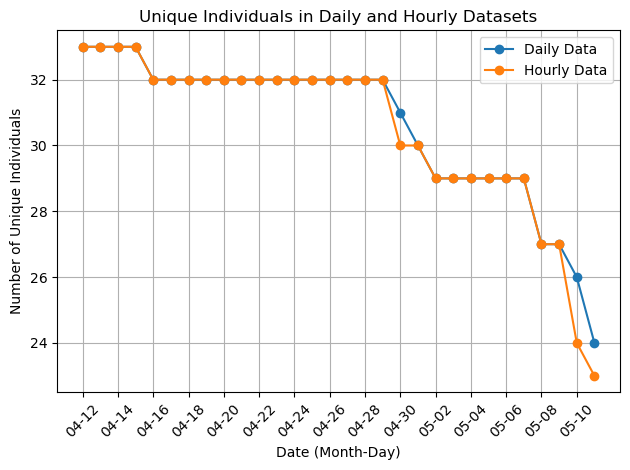


<div style='text-align: center;'>
    <i><b>Figure 2</b>: Trends in unique individuals per date for Daily and Hourly datasets, both showing a decline in the number of individuals over time, though more rapidly in the Hourly dataset.</i>
</div>


In [ ]:
# Checking how much data we have for date in each dataframe 

daily_per_date = daily_data.groupby('ActivityDay')['Id'].nunique().reset_index()
hourly_per_date = hourly_data.groupby('ActivityDate')['Id'].nunique().reset_index()

plt.plot(daily_per_date['ActivityDay'], daily_per_date['Id'], label='Daily Data', marker='o')
plt.plot(hourly_per_date['ActivityDate'], hourly_per_date['Id'], label='Hourly Data', marker='o')

#plt.title('Unique Individuals per Date in Daily and Hourly Datasets')
plt.title('Unique Individuals in Daily and Hourly Datasets')
plt.xlabel('Date (Month-Day)')
plt.ylabel('Number of Unique Individuals')
plt.xticks(rotation=45)

plt.legend()
plt.grid()

x_ticks = daily_per_date['ActivityDay'].dt.strftime('%m-%d')  # Create x_ticks with month-day format
plt.xticks(ticks=daily_per_date['ActivityDay'][::2], labels=x_ticks[::2], rotation=45)

plt.tight_layout()

plt.show()

caption = """
<div style='text-align: center;'>
    <i><b>Figure 2</b>: Trends in unique individuals per date for Daily and Hourly datasets, both showing a decline in the number of individuals over time, though more rapidly in the Hourly dataset.</i>
</div>
"""
display(Markdown(caption))



Based on the graph, the number of unique individuals is initially high and consistent across both the daily and hourly datasets. From the second half of the month, there is a decreasing trend in the number of unique individuals, which is unexpected.

After the 29th of April, the number of individuals in the hourly dataset declines more rapidly than in the daily dataset. This nullifies the assumption that both datasets have no significant gaps in data. It also suggests that missing data or inconsistent coverage is present in the hourly data. Hence, performing straightforward comparisons between daily and hourly data would result in a mismatch of data points, potentially leading to biased conclusions. 

To resolve this, adherence measures may be applied to the hourly dataset, ensuring that those days that have reliable hourly data (e.g., days with sufficient steps and wear-time) are identified. The daily dataset may then be filtered using these reliable dates, meaning that only the same days are included in each dataset. This effectively synchronises both datasets.

Thus, our numerical assumptions can be upheld by applying adherence measures and considering only reliable data points. This approach will be applied in further analysis.

### Conceptual Assumptions

The assumption of Uniform Device Use is validated by the requirement that all participants in the survey were instructed to use the Fitbit step-tracking device, ensuring consistency in data collection.

Fuller et al. has found that FitBit devices are generally accurate in controlled settings, but may underestimate step counts in free-living conditions, slightly nullifying the remaining assumptions. However, as this underestimation affects all days of the week, it is unlikely to bias our comparison of weekdays and weekends.

# Adherence Analysis

In this analysis of comparing weekdays vs. weekends activity levels, the median was used as the measure for central tendency because:
- It is robust to outliers and provides a better representation of typical activity.
- It handles skewed distributions of step counts effectively.
- It remains resilient to missing or incomplete data, which is likely given the application of adherence filters.
 
## Applying Adherence Definitions

Adherence is referred to the extent to which participants engage in physical activity, measured against specific criteria. These measures filter datasets to include *valid days* of activity. In the study by Tang et al (2018) adherence was measured by four distinct measures, which each measure defined below:

- **0 Steps:** A day is considered valid, if there is at least one step taken.
- **500 Steps:** A day is valid if it records more than 500 steps, indicating a significant level of activity. 
- **3-a-day:** A day is considered valid if there are at least three time periods (3 am to 11 am, 11 am to 3 pm, and 3 pm to 3 am) during the day in which the user recorded steps. 
- **Minimum 10 hours:** A day is valid if activity is recorded for at least ten hours throughout the day.


To adequately address concerns of adherence, all analysis will be performed on each of these different adherence definitions, to ensure a lack of adherence doesn't impact the conclusions drawn. The code to do so is set up below.

**Adherence Measure 1**: 500 Steps

In [ ]:
# Apply the adherence measure for minimum 500 steps daily 
daily_500_steps = daily_data[daily_data["StepTotal"] > 500].copy()

**Adherence Measure 2**: Three active times throughout the day

In [ ]:

# A function to identify the period in the day as described by Tang et al
def time_period(hour):
    if hour >= 3 and hour < 11:
        return 1
    elif hour >= 11 and hour < 15:
        return 2
    else:
        return 3

# Create a copy of hourly data to apply 3-a-day adherence 
three_a_day = hourly_data.copy()

# Convert ActivityTime to a string if it is not already
hourly_data['ActivityTime'] = hourly_data['ActivityTime'].astype(str)

# Extract the hour from ActivityTime
hourly_data['Hour'] = pd.to_datetime(hourly_data['ActivityTime'],  format='%H:%M:%S').dt.hour

# Apply the function to create the new period column
hourly_data['Period'] = hourly_data['Hour'].apply(time_period)

# Obtain step counts for each period
steps_by_period_id = hourly_data.groupby(["ActivityDate", "Id", "Period"])['StepTotal'].sum().reset_index() 

# Calculate whether there is at least one step for each period of the day, for each day
steps_by_period_id = steps_by_period_id[steps_by_period_id["StepTotal"] >= 1]
valid_3_periods_id = steps_by_period_id.groupby(["ActivityDate", "Id"]).size() == 3
valid_3_df = valid_3_periods_id[valid_3_periods_id].reset_index()  

daily_data['ActivityDay'] = pd.to_datetime(daily_data['ActivityDay']).dt.date
valid_3_df['ActivityDate'] = pd.to_datetime(valid_3_df['ActivityDate']).dt.date

# Filter the daily data to obtain only dates which are valid for the 3-a-day adherence measure
daily_3_periods = daily_data[daily_data.set_index(['ActivityDay', 'Id']).index.isin(valid_3_df.set_index(['ActivityDate', 'Id']).index)].copy() 

**Adherence measure 3**: 10 hours of data

In [ ]:
# 10 hours measure 

# Create a copy of hourly data to apply 10 hours adherence 
ten_hours_data = hourly_data.copy()

# Subset for only step counts greater than one
ten_hours_data = ten_hours_data[ten_hours_data["StepTotal"] >= 1]

# Group dataframe by the date and obtain the number of hours with at least 1 step
steps_10_hours = ten_hours_data.groupby(["ActivityDate", "Id"]).size() >= 10 

# Obtain dates where the count is at least 10
valid_10_hours_df = steps_10_hours[steps_10_hours].reset_index() 

daily_data['ActivityDay'] = pd.to_datetime(daily_data['ActivityDay'])
valid_10_hours_df['ActivityDate'] = pd.to_datetime(valid_10_hours_df['ActivityDate'])

# Filter the daily data to obtain only dates which are valid for the minimum 10 hours adherence measure
daily_10_hours = daily_data[daily_data.set_index(['ActivityDay', 'Id']).index.isin(valid_10_hours_df.set_index(['ActivityDate', 'Id']).index)].copy() 

## Adherence Visualisations
To gain an overview of the effect of these adherence filters, we will count the number of valid days with each definition. It is predicted that the number of valid days will decrease. This reduction is expected because the stricter criteria will filter out days where the user's activity levels were low or inconsistent, leading to a more accurate representation of their physical activity patterns.

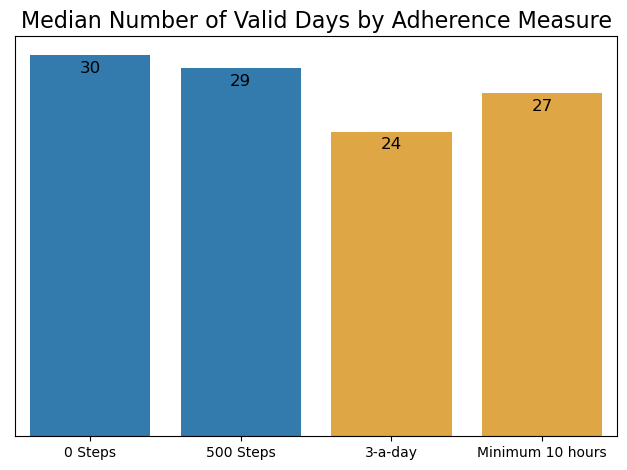


<div style='text-align: center;'>
    <i><b>Figure 3:</b> Median number of valid days (days meeting adherence criteria) for each adherence measure, illustrating how stricter criteria for physical activity leads to a decrease in valid days.</i>
</div>


In [ ]:
## Median diff by adherence 

# Create a dictionary of the median number of days for each adherence measure to visualise
days_count = {
    "0 Steps": daily_data.groupby("Id")["ActivityDay"].nunique().median(),
    "500 Steps": daily_500_steps.groupby("Id")["ActivityDay"].nunique().median(),
    "3-a-day": daily_3_periods.groupby("Id")["ActivityDay"].nunique().median(),
    "Minimum 10 hours": daily_10_hours.groupby("Id")["ActivityDay"].nunique().median(),
}

# Convert the dictionary to a DataFrame
days_count_df = pd.DataFrame(list(days_count.items()), columns=['Measure', 'Count'])

days_count_df['Count'] = days_count_df['Count'].astype(int)  # Convert to integer

# Define a color palette: Blue for "0 Steps" and "500 Steps", Orange for the others
colors = [(0.12, 0.49, 0.76), (0.12, 0.49, 0.76), (0.97, 0.68, 0.17), (0.97, 0.68, 0.17)]

# Using Seaborn to plot the histogram
ax = sns.barplot(x='Measure', y='Count', data=days_count_df, palette=colors, dodge=False)

# Adding titles and labels
plt.title('Median Number of Valid Days by Adherence Measure', fontsize=16)
plt.xlabel('')

plt.ylabel('')  # No label
ax.yaxis.set_visible(False)  # Hide y-axis ticks

# Add average number of days as text on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Show only the integer value
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, -15),
                textcoords='offset points')  

# Display the plot
plt.tight_layout()
plt.show()

caption = """
<div style='text-align: center;'>
    <i><b>Figure 3:</b> Median number of valid days (days meeting adherence criteria) for each adherence measure, illustrating how stricter criteria for physical activity leads to a decrease in valid days.</i>
</div>
"""

display(Markdown(caption))

The prediction that the number of valid days would decrease with stricter adherence measures does appear to hold; the number of valid days substantially decreases with stricter 3-a-day and 10 hours of activity adherence measures.

Comparing across types of days, weekdays and weekends, it is predicted that there will be a drop in valid days during weekends. This is based on the assumption that users are generally more active during structured weekdays (work or school) and less active on weekends, when routines might be more relaxed.

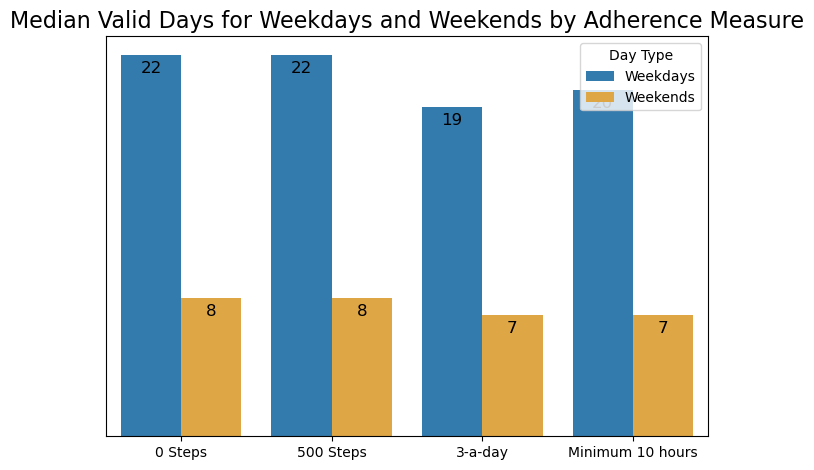


<div style='text-align: center;'>
    <i><b>Figure 4:</b> Comparing median valid days of weekdays and weekends by adherence measures, it is observed that weekends consistently have fewer valid days.</i>
</div>


In [ ]:
# Adherence num days by day type 
# Calculate median counts for weekdays and weekends per person
counts = {
    'Measure': [],
    'Weekdays': [],
    'Weekends': []
}

def calculate_median_counts(dataset, dataset_name):
    weekday_count = dataset[~dataset['IsWeekend']].groupby('Id').size().median()  
    weekend_count = dataset[dataset['IsWeekend']].groupby('Id').size().median()  
    counts['Measure'].append(dataset_name)
    counts['Weekdays'].append(weekday_count)
    counts['Weekends'].append(weekend_count)

# Calculate average counts for each dataset
calculate_median_counts(daily_data, '0 Steps')
calculate_median_counts(daily_500_steps, '500 Steps')
calculate_median_counts(daily_3_periods, '3-a-day')
calculate_median_counts(daily_10_hours, 'Minimum 10 hours')

# Convert counts to a DataFrame
counts_df = pd.DataFrame(counts)

# Melt the DataFrame for easier plotting with Seaborn
counts_melted = counts_df.melt(id_vars='Measure', value_vars=['Weekdays', 'Weekends'], 
                                 var_name='Day Type', value_name='Average Count')

# Convert to integers
counts_melted['Average Count'] = counts_melted['Average Count'].astype(int)


# Plot using Seaborn with custom colors for weekdays and weekends
custom_palette = {'Weekdays': (0.12, 0.49, 0.76), 'Weekends': (0.97, 0.68, 0.17)}
ax = sns.barplot(x='Measure', y='Average Count', hue='Day Type', data=counts_melted, palette=custom_palette)

# Adding titles and labels
plt.title('Median Valid Days for Weekdays and Weekends by Adherence Measure', fontsize=16)  
plt.xlabel('')

# Remove y-axis label and ticks
plt.ylabel('')  # No label
ax.yaxis.set_visible(False)  # Hide y-axis ticks

for p in ax.patches:
    if p.get_height() > 0:  # Only annotate for height above 0; fixes issue that added extra annotations
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=12, color='black', 
                    xytext=(0, -15),
                    textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

caption = """
<div style='text-align: center;'>
    <i><b>Figure 4:</b> Comparing median valid days of weekdays and weekends by adherence measures, it is observed that weekends consistently have fewer valid days.</i>
</div>
"""
display(Markdown(caption))

The drop in number of weekdays and weekends appear to coincide quite consistently with one another, rejecting the prediction that the drop in days is solely due to the weekends. 

The weekends consistently have fewer valid days compared to weekdays, which is not unexpected given typical activity patterns. Overall, the drop in valid days does not appear to be concerning, as the dataset retains most days even with the stricter adherence measures applied. This provides confidence in the completeness of the data for both weekdays and weekends.

# Visual Analysis

After establishing the completeness of the data, we can now move on to conducting visual analysis, with the aim of determining whether activity levels are higher on weekdays or weekends.

We begin by visualising the median step count on each day of the week, presenting the results across all four adherence measures discussed so far. As mentioned previously, we expect step counts to be higher on weekdays, and anticipate that these results are consistent across the adherence measures.

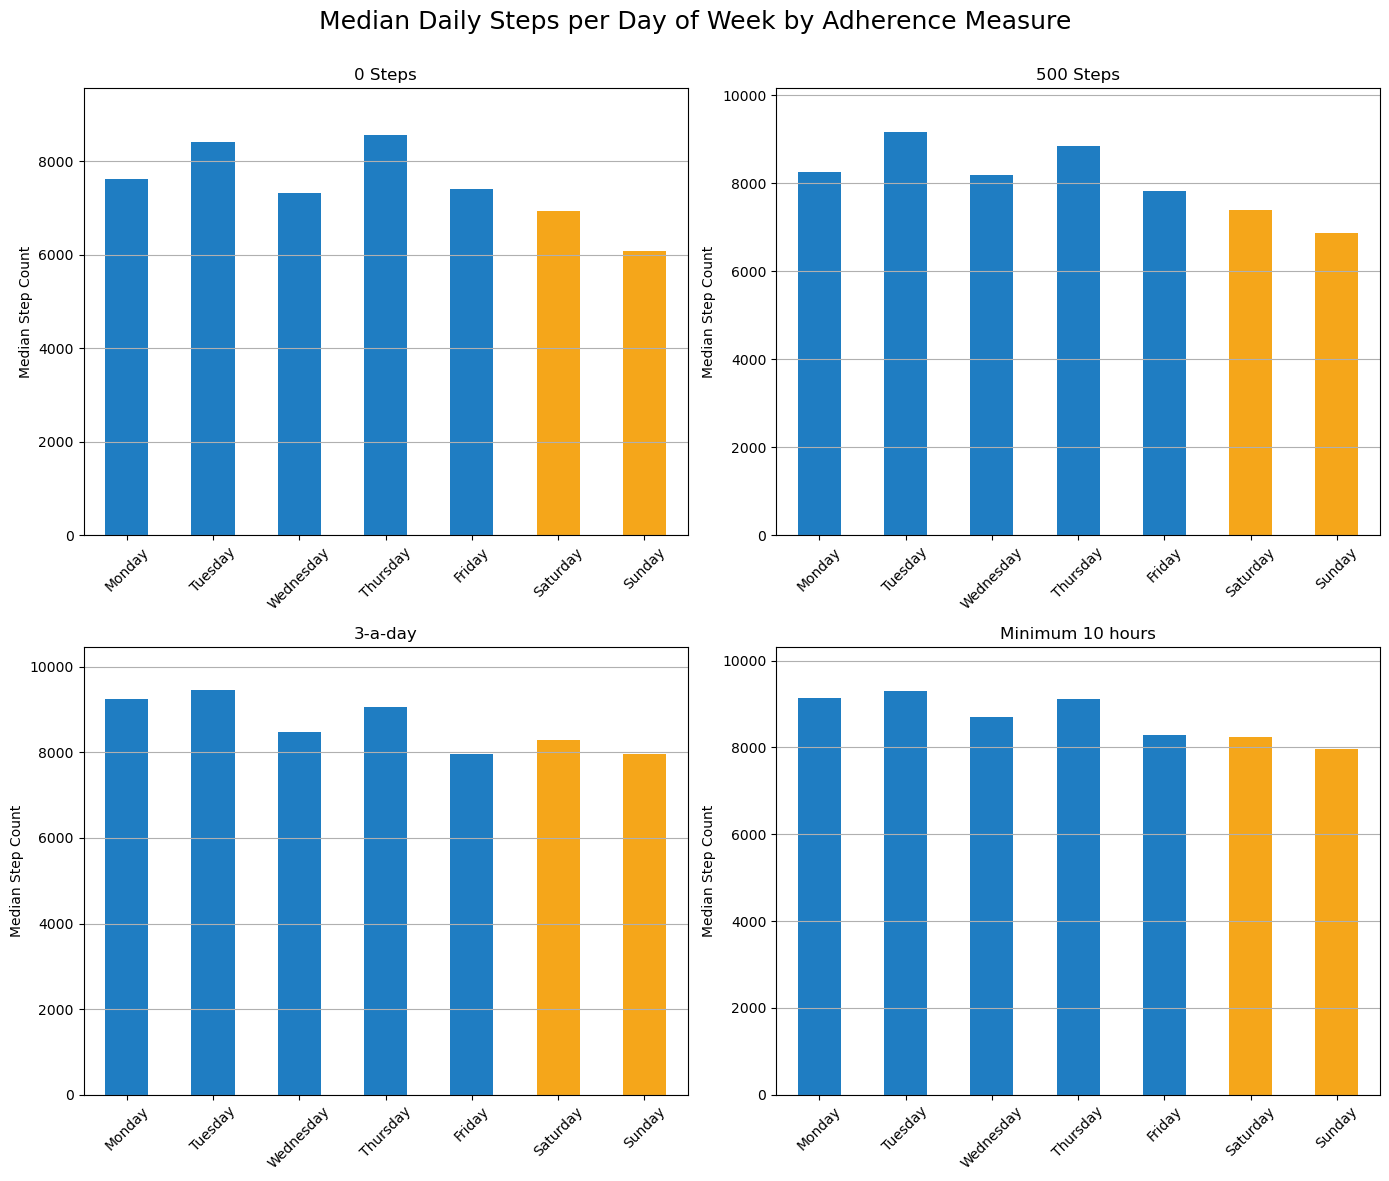


<div style='text-align: center;'>
    <i><b>Figure 5:</b> Median daily steps for each day of the week across different adherence measures, highlighting consistently lower activity levels on weekends.</i>
</div>


In [ ]:
# Median step comparison 
# Set up dfs
datasets = {
    '0 Steps': daily_data,
    '500 Steps': daily_500_steps,
    '3-a-day': daily_3_periods,
    'Minimum 10 hours': daily_10_hours
}

fig, axes = plt.subplots(2, 2, figsize=(14, 12)) # Format subplots
axes = axes.flatten() # Flatten axes for iteration

for ax, (title, df) in zip(axes, datasets.items()):
    med_daily_steps = df.groupby('DayName', observed=True)['StepTotal'].median().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )
    
    med_daily_steps.plot(kind='bar', color=[(0.96, 0.65, 0.10) if day in ['Saturday', 'Sunday'] else (0.12, 0.49, 0.76) for day in med_daily_steps.index], ax=ax)
    ax.set_title(f'{title}') 
    ax.set_xlabel('')  
    ax.set_ylabel('Median Step Count')
    ax.set_xticks(range(len(med_daily_steps.index)))
    ax.set_xticklabels(med_daily_steps.index, rotation=45)

    ax.grid(axis='y')

    ax.set_ylim(0, med_daily_steps.max() + 1000)  

plt.suptitle('Median Daily Steps per Day of Week by Adherence Measure\n', fontsize=18)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

caption = """
<div style='text-align: center;'>
    <i><b>Figure 5:</b> Median daily steps for each day of the week across different adherence measures, highlighting consistently lower activity levels on weekends.</i>
</div>
"""
display(Markdown(caption))

In the plots above, the median step counts are generally higher for weekdays than weekends. This is particularly the case when using the _'500 Steps'_ or _'Minimum 10 Hours'_ measures to determine valid days. These findings support our prediction that activity levels are greater on weekdays, when people are engaging in their routines.

Although these results are consistent across the adherence measures, the median values do tend to vary based on the measure used. For instance, these values are lowest when using the _'0 Steps'_ measure, as all days with at least one step are considered. Other measures, such as the _'500 Steps'_ or _'Minimum 10 Hours'_ require greater levels of activity for a day to be considered valid, resulting in higher median steps.

To confirm these results, we can also visualise the distribution of step counts on each day of the week, again using all four adherence measures when presenting the results. We expect the distribution of step counts to be higher for weekdays than weekends, supporting the findings above.

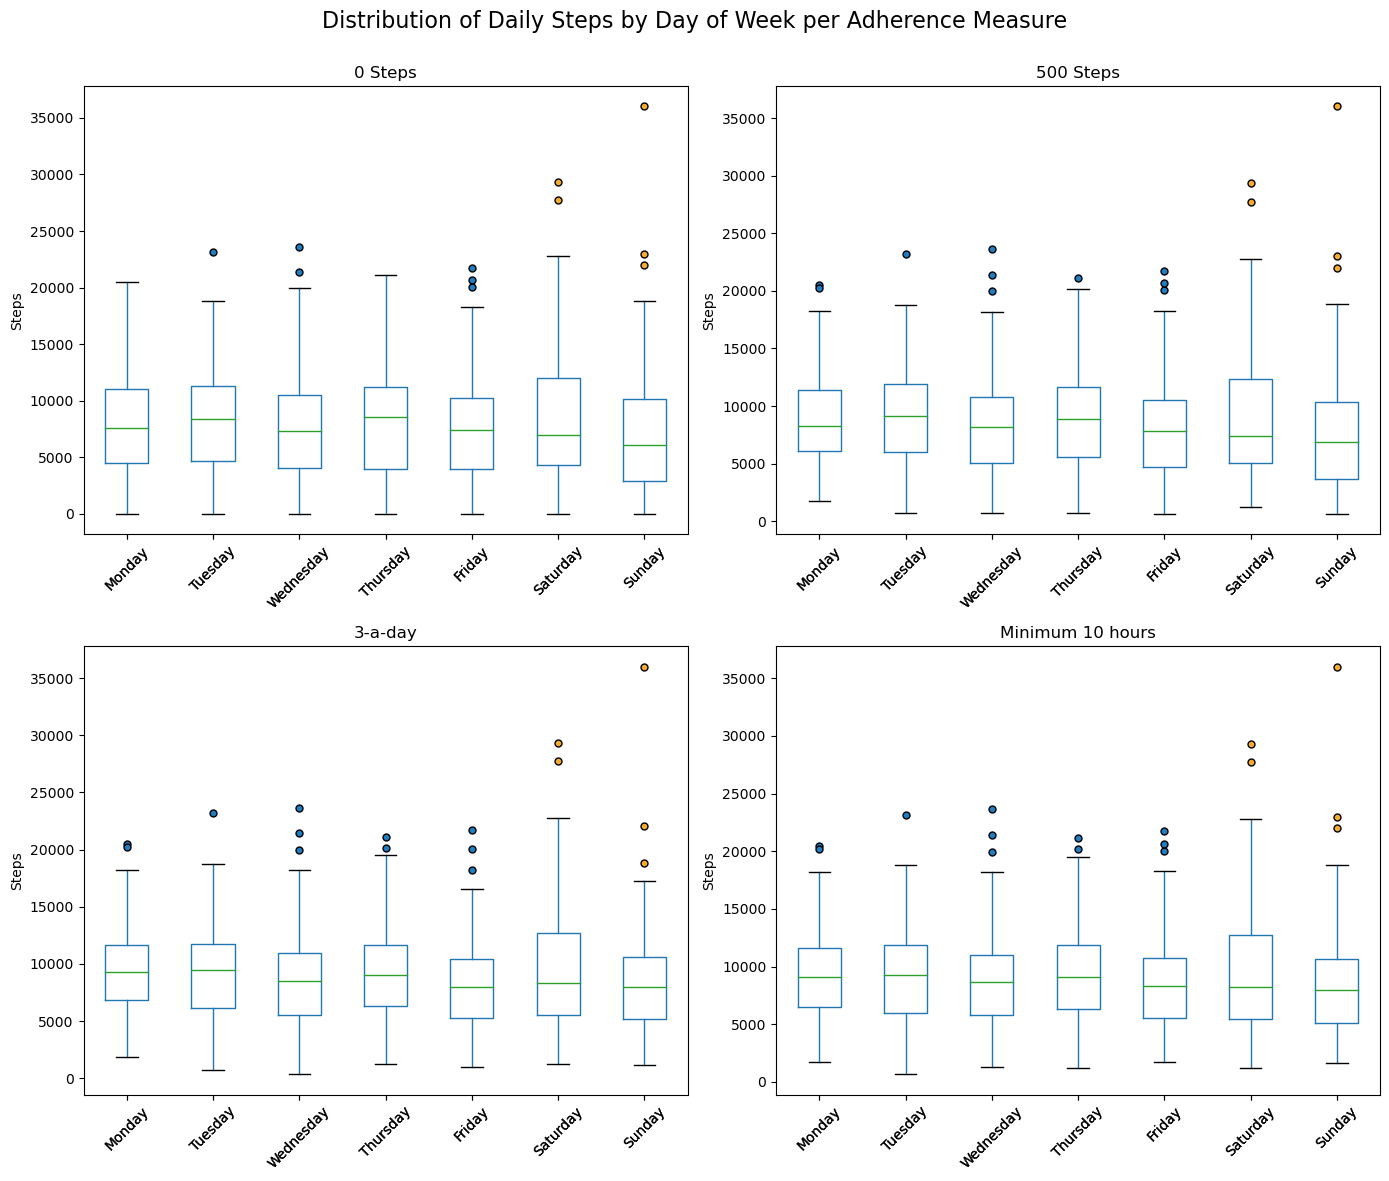


<div style='text-align: center;'>
    <i><b>Figure 6:</b> Distribution of daily step counts by day of the week for different adherence measures, illustrating little variation in activity levels throughout the week. Notable outliers are observed, with values increasing on weekends.</i>
</div>


In [ ]:
# Step distribution by day of week 

fig, axes = plt.subplots(2, 2, figsize=(14, 12)) # Format subplots
axes = axes.flatten() # Flatten axes for iteration

# Define custom properties for outliers on weekdays and weekends
weekday_flierprops = dict(marker='o', markerfacecolor=(0.12, 0.49, 0.76), markersize=5)  # Blue for weekdays
weekend_flierprops = dict(marker='o', markerfacecolor=(0.97, 0.68, 0.17), markersize=5)  # Orange for weekends

for ax, (title, df) in zip(axes, datasets.items()):
    # Reorder the days of the week to display Monday through Sunday
    df['DayName'] = pd.Categorical(
        df['DayName'],
        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        ordered=True
    )

    # Plot boxplots for weekdays and weekends separately to apply different outlier colors
    df[df['DayName'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].boxplot(
        column='StepTotal', by='DayName', grid=False, ax=ax, flierprops=weekday_flierprops
    )
    df[df['DayName'].isin(['Saturday', 'Sunday'])].boxplot(
        column='StepTotal', by='DayName', grid=False, ax=ax, flierprops=weekend_flierprops
    )

    ax.set_title(f'{title}') 
    ax.set_xlabel('')
    ax.set_ylabel('Steps')
    ax.tick_params(axis='x', labelrotation=45)

plt.suptitle('Distribution of Daily Steps by Day of Week per Adherence Measure\n', fontsize=16)  # Common title
plt.tight_layout()
plt.show()

caption = """
<div style='text-align: center;'>
    <i><b>Figure 6:</b> Distribution of daily step counts by day of the week for different adherence measures, illustrating little variation in activity levels throughout the week. Notable outliers are observed, with values increasing on weekends.</i>
</div>
"""
display(Markdown(caption))


In these box plots, the distribution of step counts is not considerably higher for weekdays relative to weekends, or vice versa, which is unexpected. Given our previous findings, this suggests that activity levels may be only slightly different between weekdays and weekends, with these differences made evident when comparing medians. The box plots also appear to be quite consistent across all four adherence measures.

Importantly, median steps do tend to be the lowest on Sundays. This may contribute to lower activity levels on weekends, supporting our predictions. The variability of the data also appears to be high on Saturdays, which have the greatest range of non-outlier values.

To investigate these patterns further, we will visualise the median step count for each day across the month. Based on our previous results, we expect to see lower median step counts on weekends, with Saturdays being higher than Sundays.

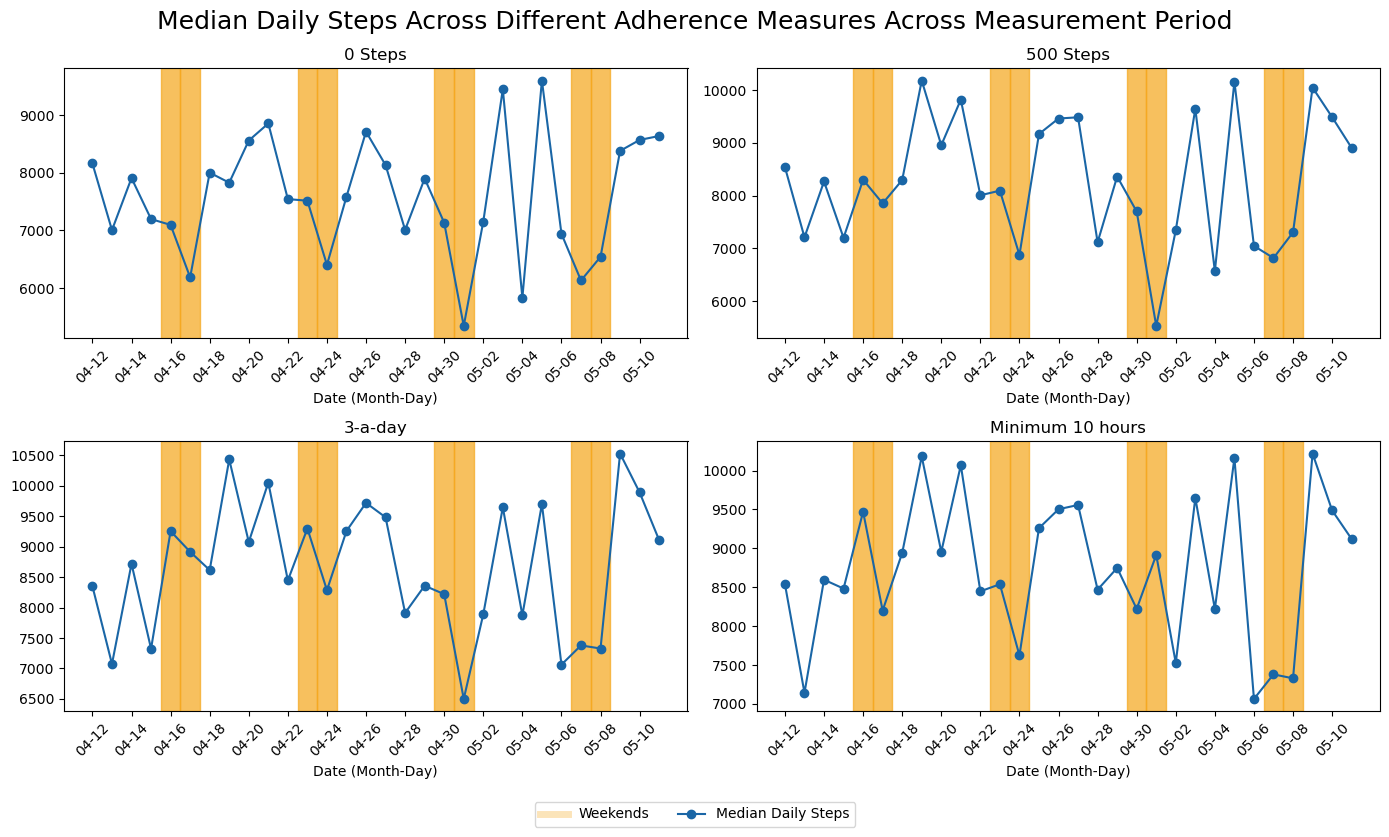


<div style='text-align: center;'>
    <i><b>Figure 7:</b> Median daily step counts across different adherence measures, indicating generally lower activity levels on weekends. Saturdays are seen to be consistently higher than Sunday across adherence measures.</i>
</div>


In [ ]:
# Daily step counts across month 
fig, axes = plt.subplots(2, 2, figsize=(14, 8)) # Format subplots
axes = axes.flatten() # Flatten axes for iteration

# Ensure 'ActivityDay' is in datetime format for all datasets
for title, df in datasets.items():
    df['ActivityDay'] = pd.to_datetime(df['ActivityDay'])
    
for ax, (title, df) in zip(axes, datasets.items()):
    avg_daily_data = df.groupby('ActivityDay', as_index=False)['StepTotal'].median()
    # Shade the weekends
    weekend_patch = plt.Line2D([0], [0], color=(0.96, 0.65, 0.10), alpha=0.3, lw=5, label='Weekends')
    for i in range(len(avg_daily_data)):
        if df['IsWeekend'].iloc[i] == True:
            ax.axvspan(avg_daily_data['ActivityDay'].iloc[i] - pd.Timedelta(days=0.5),
                       avg_daily_data['ActivityDay'].iloc[i] + pd.Timedelta(days=0.5),
                       alpha=0.7, color=(0.96, 0.65, 0.10))

    # Create the plot with darker blue color
    ax.plot(avg_daily_data['ActivityDay'], avg_daily_data['StepTotal'], marker='o', color=(0.10, 0.40, 0.65), label='Average Total Steps')
    ax.set_title(f'{title}')
    
    ax.set_ylabel('') 
    ax.set_xticks(avg_daily_data['ActivityDay'][::2])  

    ax.set_xticklabels(avg_daily_data['ActivityDay'].dt.strftime('%m-%d')[::2], rotation=45)
    ax.set_xlabel('Date (Month-Day)')

handles = [weekend_patch, ax.lines[0]]  # Collect handles from the last subplot
fig.legend(handles, ['Weekends', 'Median Daily Steps'], loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))

plt.suptitle('Median Daily Steps Across Different Adherence Measures Across Measurement Period', fontsize=18) 
plt.tight_layout()
plt.show()

caption = """
<div style='text-align: center;'>
    <i><b>Figure 7:</b> Median daily step counts across different adherence measures, indicating generally lower activity levels on weekends. Saturdays are seen to be consistently higher than Sunday across adherence measures.</i>
</div>
"""
display(Markdown(caption))


There appears to be an increased variability in median values as the adherence measures become stricter (i.e., moving from _'0 Steps'_ to _'Minimum 10 Hours'_. However, across all plots, median steps do tend to decline over the weekends. This supports our previous findings, as well as our initial predictions, that activity levels are greater on weekdays compared to weekends. As expected, median steps on Saturdays are also consistently higher than on Sundays.

Hence, this visual analysis has revealed that:
- Median steps are generally higher on weekdays compared to weekends, with Sundays exhibiting the lowest activity levels.
- The distribution of step counts does not vary considerably between each day fo the week. Instead, differences between weekdays and weekends are most evident when considering the median.
- Results are consistent across the different adherence measures, but stricter adherence measures result in higher median values.

# Final Results

To conclude, we will compute median step counts on weekdays and weekends, using all four adherence measures. Based on our initial predictions and findings of the visual analysis, we expect to see greater activity on weekdays relative to weekends.

In [ ]:
# Median diff by adherence 

# Initialise a dictionary to store the measure names and the median steps for weekdays and weekends
medians_dict = {
    'Measure': [],
    'Weekdays': [],
    'Weekends': []
}

# Function to calculate the median steps for weekdays and weekends
def calculate_medians(dataset, name):
    # Filter the dataset into weekdays and weekends
    weekdays = dataset[dataset["IsWeekend"] == False]
    weekends = dataset[dataset["IsWeekend"] == True]
    
    # Calculate median steps for weekdays and weekends
    weekdays_median = weekdays["StepTotal"].median()
    weekends_median = weekends["StepTotal"].median()

    # Append the results to the dictionary
    medians_dict["Measure"].append(name)
    medians_dict["Weekdays"].append(weekdays_median)
    medians_dict["Weekends"].append(weekends_median)

# Call the function for each dataset and adherence measure
calculate_medians(daily_data, "0 Steps")
calculate_medians(daily_500_steps, "500 Steps")
calculate_medians(daily_3_periods, "3-a-day")
calculate_medians(daily_10_hours, "Minimum 10 hours")
    
# Convert the dictionary to a DataFrame
medians_df = pd.DataFrame(medians_dict)

medians_df['Weekdays'] = medians_df['Weekdays'].round().astype(int)  # Rounding and converting to int
medians_df['Weekends'] = medians_df['Weekends'].round().astype(int)  # Rounding and converting to int

table_title = "Median Step Counts by Adherence Measures for Weekdays and Weekends"
display(Markdown(f"<h4 style='text-align: center;'>{table_title}</h4>"))  # Center the title

# Center the table using Pandas' style method
styled_table = medians_df.style.set_table_attributes('style="margin: auto;"')

# Display the styled table
display(styled_table)

# Caption for the table
caption = """
<div style='text-align: center;'>
    <i><b>Table 11:</b> Median daily step counts for weekdays and weekends across different adherence measures. The data suggests that activity levels are consistently higher on weekdays compared to weekends.</i>
</div>
"""
# Display the caption after the table
display(Markdown(caption))

<h4 style='text-align: center;'>Median Step Counts by Adherence Measures for Weekdays and Weekends</h4>

,Measure,Weekdays,Weekends
0,0 Steps,7907,6708
1,500 Steps,8552,7316
2,3-a-day,8869,8199
3,Minimum 10 hours,8932,8168



<div style='text-align: center;'>
    <i><b>Table 11:</b> Median daily step counts for weekdays and weekends across different adherence measures. The data suggests that activity levels are consistently higher on weekdays compared to weekends.</i>
</div>


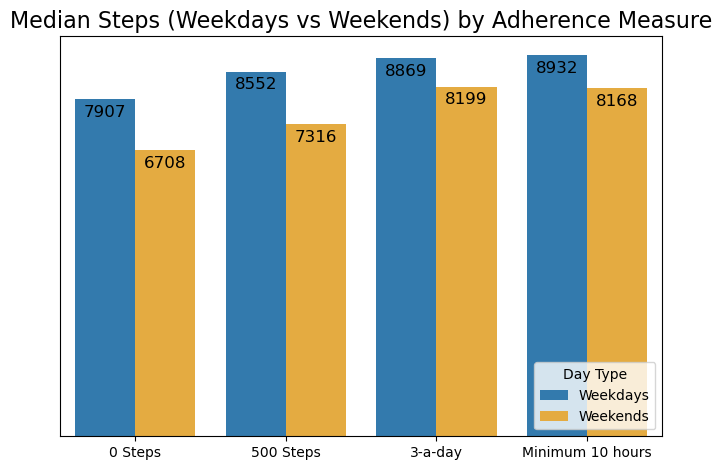


<div style='text-align: center;'>
    <i><b>Figure 8:</b> Median step counts for weekdays and weekends across adherence measures. This analysis shows increased activity on weekdays, likely due to structured schedules, while weekends display consistently lower activity levels.</i>
</div>


In [ ]:

# Melt the DataFrame for easier plotting with Seaborn
median_melted = medians_df.melt(id_vars='Measure', value_vars=['Weekdays', 'Weekends'], 
                               var_name='Day Type', value_name='Median Steps')

# Define custom color palette with RGB values for specified colors
custom_palette = {'Weekdays': (0.12, 0.49, 0.76), 'Weekends': (1.0, 0.70, 0.15)}

# Plot using Seaborn with the custom colors
ax = sns.barplot(x='Measure', y='Median Steps', hue='Day Type', data=median_melted, palette=custom_palette)

# Adding titles and labels
plt.title('Median Steps (Weekdays vs Weekends) by Adherence Measure', fontsize=16)

plt.xlabel('')
plt.ylabel('')
ax.yaxis.set_visible(False)  

plt.xticks(rotation=0)

plt.legend(title='Day Type', loc='lower right')

for p in ax.patches:
    if p.get_height() > 0:  # Only annotate for height above 0; fixes issue that added extra annotations
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=12, color='black', 
                    xytext=(0, -15),
                    textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

caption = """
<div style='text-align: center;'>
    <i><b>Figure 8:</b> Median step counts for weekdays and weekends across adherence measures. This analysis shows increased activity on weekdays, likely due to structured schedules, while weekends display consistently lower activity levels.</i>
</div>
"""
display(Markdown(caption))

## Final Statement

Both the table and plot of median step counts for different adherence measures show a clear pattern of higher activity on weekdays than on weekends.

- **There was a median of 7,907 steps on weekdays and 6,708 steps on weekends for days where at least one step was recorded.** \
The difference between weekdays and weekends suggests that participants tend to be more active during the week, likely due to regular routines such as commuting, work, or school, which encourage more movement.

- **There was a median of 8,552 steps on weekdays and 7,316 steps on weekends for days where more than 500 steps were recorded.** \
Even after filtering out low activity days, median step counts remain higher on weekdays, reinforcing the idea that structured activities during the week lead to more consistent movement compared to the more relaxed schedule typically seen on weekends.

- **There was a median of 8,869 steps on weekdays and 8,199 steps on weekends for days which recorded steps during at least three distinct time periods.** \
The higher median step count on weekdays suggests that participants not only move more during the week but also maintain more consistent activity throughout the day, compared to weekends.

- **There was a median of 8,932 steps on weekdays and 8,168 steps on weekends for days which had step data for at least 10 hours.** \
Even under this strict criteria, weekday activity remains higher. This indicates that sustained periods of movement are more common on weekdays, likely due to structured daily schedules that promote prolonged activity.

Overall, activity levels for these people are greater on weekdays, when they are likely to be engaged in structured activities which encourage more movement, such as commuting to school or work. This result confirms our initial predictions that people in this data are more active on weekdays. Weekends, on the other hand, show consistently lower activity, possibly reflecting a more relaxed schedule with fewer structured opportunities for physical activity.